# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.432  1  0.682 0.410 0.004   
                             age        0.260  1  0.411 0.522 0.002   
                             Kiel       2.651  1  4.181 0.042 0.021   
                             Magdeburg  5.041  1  7.950 0.005 0.040   
                             Sweden     8.020  1 12.648 0.000 0.062   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.368  1  0.422 0.517 0.002   
                             age        2.451  1  2.811 0.095 0.015   
                             Kiel       0.019  1  0.021 0.884 0.000   
                             Magdeburg  2.585  1  2.965 0.087 0.015   
                             Sweden    13.556  1 15.551 0.000 0.075   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.387  0.571    False  
                             age               0.282  0.667    False  
                             Kiel              1.374  0.105    False  
                             Magdeburg         2.274  0.020     True  
                             Sweden            3.324  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.287  0.663    False  
                             age               1.021  0.200    False  
                             Kiel              0.053  0.933    False  
                             Magdeburg         1.062  0.186    False  
                             Sweden            3.948  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.114  1  8.164 0.005 0.041   
                             age        0.004  1  0.032 0.859 0.000   
                             Kiel       0.244  1  1.791 0.182 0.009   
                             Magdeburg  0.413  1  3.030 0.083 0.016   
                             Sweden     1.581  1 11.585 0.001 0.057   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.100  1  3.870 0.051 0.020   
                             age        1.023  1  1.884 0.171 0.010   
                             Kiel       3.347  1  6.168 0.014 0.031   
                             Magdeburg  3.339  1  6.153 0.014 0.031   
                             Sweden    29.421  1 54.216 0.000 0.221   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.324  0.014     True  
                             age               0.066  0.909    False  
                             Kiel              0.739  0.292    False  
                             Magdeburg         1.079  0.156    False  
                             Sweden            3.092  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.296  0.104    False  
                             age               0.766  0.278    False  
                             Kiel              1.858  0.035     True  
                             Magdeburg         1.854  0.035     True  
                             Sweden           11.282  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.005         2.324  0.014     True   
                             age       0.859         0.066  0.909    False   
                             Kiel      0.182         0.739  0.292    False   
                             Magdeburg 0.083         1.079  0.156    False   
                             Sweden    0.001         3.092  0.003     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.051         1.296  0.104    False   
                             age       0.171         0.766  0.278    False   
                             Kiel      0.014         1.858  0.035     True   
                             Magdeburg 0.014         1.854  0.035     True   
                             Sweden    0.000        11.282  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.410         0.387  0.571    False  
                             age       0.522         0.282  0.667    False  
                             Kiel      0.042         1.374  0.105    False  
                             Magdeburg 0.005         2.274  0.020     True  
                             Sweden    0.000         3.324  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.517         0.287  0.663    False  
                             age       0.095         1.021  0.200    False  
                             Kiel      0.884         0.053  0.933    False  
                             Magdeburg 0.087         1.062  0.186    False  
                             Sweden    0.000         3.948  0.001     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.223         3.362     0.275     0.260         2.487     0.336
std       0.292         6.427     0.318     0.303         5.370     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.414     0.002     0.004         0.338     0.015
50%       0.060         1.225     0.119     0.118         0.927     0.237
75%       0.386         3.375     0.515     0.459         2.430     0.612
max       0.999        86.830     0.999     1.000       146.908     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.005         2.324   
A0A024R0T9;K7ER74;P02655                           AD     0.041         1.388   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.234         0.630   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.260         0.584   
A0A075B6H7                                         AD     0.002         2.805   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.357         0.447   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.584         0.234   
S4R3U6                                             AD     0.051         1.296   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.014     True   
A0A024R0T9;K7ER74;P02655                           AD      0.087    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.355    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.385    False   
A0A075B6H7                                         AD      0.005     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.283    False   
Q9Y6X5                                             AD      0.487    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.157    False   
Q9Y6Y9                                             AD      0.695    False   
S4R3U6                                             AD      0.104    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.410         0.387   
A0A024R0T9;K7ER74;P02655                           AD     0.045         1.344   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.180         0.744   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.598         0.223   
A0A075B6H7                                         AD     0.190         0.722   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.015         1.830   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.489         0.311   
S4R3U6                                             AD     0.517         0.287   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.571    False  
A0A024R0T9;K7ER74;P02655                           AD      0.112    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.322    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.731    False  
A0A075B6H7                                         AD      0.335    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.234         1.620     0.293     0.255         1.409     0.336
std       0.287         1.895     0.311     0.295         1.615     0.320
min       0.000         0.002     0.000     0.000         0.000     0.000
25%       0.007         0.401     0.019     0.012         0.364     0.038
50%       0.085         1.069     0.159     0.117         0.933     0.234
75%       0.397         2.168     0.525     0.433         1.938     0.591
max       0.995        24.271     0.996     0.999        20.724     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,932,1028


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.005         2.324  0.014   
A0A024R0T9;K7ER74;P02655                           0.041         1.388  0.087   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.234         0.630  0.355   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.260         0.584  0.385   
A0A075B6H7                                         0.002         2.805  0.005   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.283   
Q9Y6X5                                             0.357         0.447  0.487   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.157   
Q9Y6Y9                                             0.584         0.234  0.695   
S4R3U6                                             0.051         1.296  0.104   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.410   
A0A024R0T9;K7ER74;P02655                              False 0.045   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.180   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.598   
A0A075B6H7                                             True 0.190   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.015   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.489   
S4R3U6                                                False 0.517   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.387  0.571   
A0A024R0T9;K7ER74;P02655                                   1.344  0.112   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.744  0.322   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.223  0.731   
A0A075B6H7                                                 0.722  0.335   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.315   
Q9Y6X5                                                     1.830  0.046   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.311  0.638   
S4R3U6                                                     0.287  0.663   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                 True       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    874
DAE (yes) - PI (yes)   335
DAE (yes) - PI (no)    154
DAE (no)  - PI (yes)    58
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.005         2.324  0.014     True 0.410   
A0A075B6H7                   0.002         2.805  0.005     True 0.190   
A0A075B6I0                   0.001         3.196  0.002     True 0.024   
A0A075B6R2                   0.001         3.256  0.002     True 0.540   
A0A075B6S5                   0.006         2.196  0.018     True 0.040   
...                            ...           ...    ...      ...   ...   
Q9UMX0;Q9UMX0-2;Q9UMX0-4     0.046         1.333  0.097    False 0.002   
Q9UP79                       0.000         4.677  0.000     True 0.321   
Q9UQ52                       0.000         3.412  0.002     True 0.190   
Q9Y6C2                       0.002         2.742  0.006     True 0.617   
Q9Y6X5                       0.357         0.447  0.487    False 0.015   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.387  0.571    False       186  
A0A075B6H7                           0.722  0.335    False        91  
A0A075B6I0                           1.614  0.069    False       194  
A0A075B6R2                           0.268  0.681    False       164  
A0A075B6S5                           1.395  0.102    False       129  
...                                    ...    ...      ...       ...  
Q9UMX0;Q9UMX0-2;Q9UMX0-4             2.716  0.009     True        57  
Q9UP79                               0.494  0.485    False       135  
Q9UQ52                               0.720  0.336    False       188  
Q9Y6C2                               0.210  0.744    False       119  
Q9Y6X5                               1.830  0.046     True       173  

[212 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.014,0.571,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.087,0.112,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.355,0.322,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.385,0.731,196,DAE (no) - PI (no)
A0A075B6H7,0.005,0.335,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.283,0.315,197,DAE (no) - PI (no)
Q9Y6X5,0.487,0.046,173,DAE (no) - PI (yes)
Q9Y6Y8;Q9Y6Y8-2,0.157,0.181,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P48745,0.006,0.999,180,DAE (yes) - PI (no),0.993
O15197;O15197-3,0.001,0.975,104,DAE (yes) - PI (no),0.974
P22692;P22692-2,0.040,0.987,170,DAE (yes) - PI (no),0.948
O15204;O15204-2,0.014,0.947,156,DAE (yes) - PI (no),0.934
P22748,0.032,0.963,159,DAE (yes) - PI (no),0.931
...,...,...,...,...,...
A0A0J9YXX1,0.046,0.057,197,DAE (yes) - PI (no),0.011
F5GY80;F5H7G1;P07358,0.046,0.057,197,DAE (yes) - PI (no),0.011
Q9NX62,0.045,0.055,197,DAE (yes) - PI (no),0.011


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


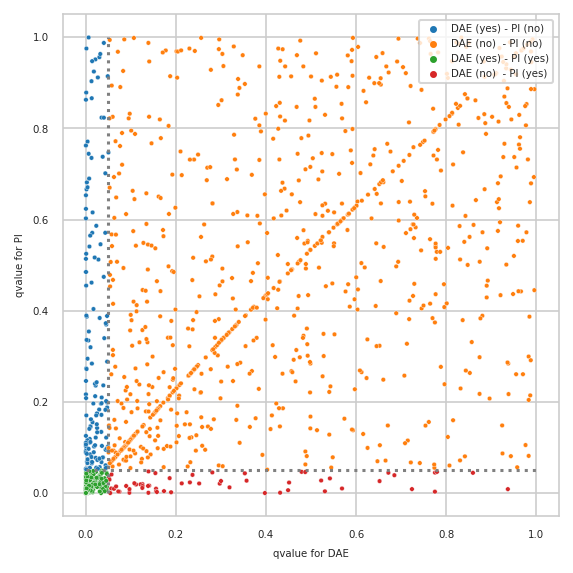

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


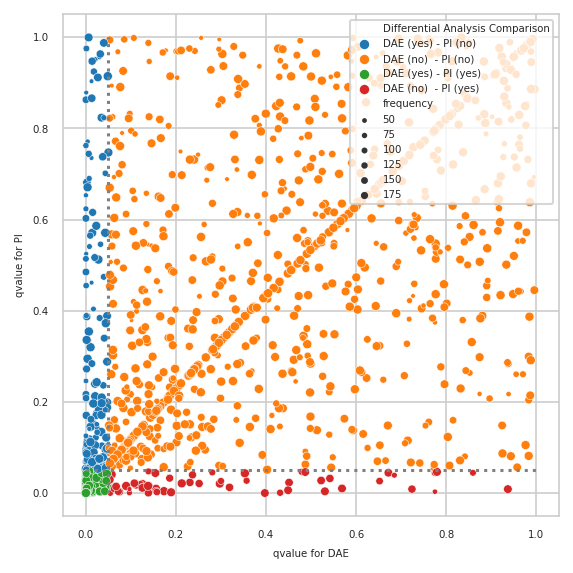

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out